<a href="https://colab.research.google.com/github/ivandenb/MAT-442-Fall-2024-/blob/main/HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maximum Likelihood Explanation**

2.4.1 MLE for Random Samples

Using a Maximum Likelihood Estimation for a set of random samples to help estimate the parameters

Start with generating the data by taking 100 samples rom a normal distribution with a mean of 4 and a standard deviation of 2

In [5]:
#import

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize#used to help minimize(assistance from AI)


# Generate random samples from a normal distribution
np.random.seed(0)  # for reproducibility
true_mean = 5
true_std = 2
samples = np.random.normal(loc=true_mean, scale=true_std, size=100)

print(samples)

[ 8.52810469  5.80031442  6.95747597  9.4817864   8.73511598  3.04544424
  6.90017684  4.69728558  4.7935623   5.821197    5.28808714  7.90854701
  6.52207545  5.24335003  5.88772647  5.66734865  7.98815815  4.58968347
  5.6261354   3.29180852 -0.10597963  6.30723719  6.7288724   3.51566996
  9.53950925  2.09126865  5.09151703  4.6256323   8.06555843  7.93871754
  5.30989485  5.75632504  3.2244285   1.03840706  4.3041757   5.31269794
  7.46058136  7.4047597   4.22534637  4.3953945   2.90289407  2.15996413
  1.58745962  8.90155079  3.98069564  4.1238514   2.49440928  6.55498071
  1.7722043   4.57451944  3.20906688  5.773805    3.97838972  2.63873563
  4.94363554  5.85666374  5.13303444  5.6049438   3.73135581  4.27451767
  3.6550791   4.28089368  3.37370744  1.5474348   5.35485228  4.19643813
  1.73960331  5.92556451  3.18540327  5.10389079  6.45818112  5.25796582
  7.27880137  2.53034836  5.80468328  3.63037982  3.2584057   3.84230067
  4.37689494  5.11233068  2.66970032  6.80165297  5

In [6]:
#With help from the internet as well as AI, I was able to calculate the log-liklihood distribution

# Calculate the log-likelihood function for a normal distribution
def log_likelihood(data, mu, sigma):
    n = len(data)
    log_lik = -n / 2 * np.log(2 * np.pi) - n * np.log(sigma) - 1 / (2 * sigma**2) * np.sum((data - mu)**2)
    return log_lik


We will then numerically optimize the parameters with use of scipy.optimize

In [7]:
# Function to minimize
def negative_log_likelihood(params, data):
    mu, sigma = params
    return -log_likelihood(data, mu, sigma)

initial_guess = [0, 1]  # Initial mu and sigma
result = minimize(negative_log_likelihood, initial_guess, args=(samples,), method='Nelder-Mead')

# The MLE of mean and standard deviation are given by the result
mle_mean = result.x[0]
mle_std = result.x[1]

print(f"True Mean: {true_mean}, MLE Mean: {mle_mean}")
print(f"True Std: {true_std}, MLE Std: {mle_std}")



True Mean: 5, MLE Mean: 5.11959145978055
True Std: 2, MLE Std: 2.015767298227408


Then we will plot the results with the fitted normal curve

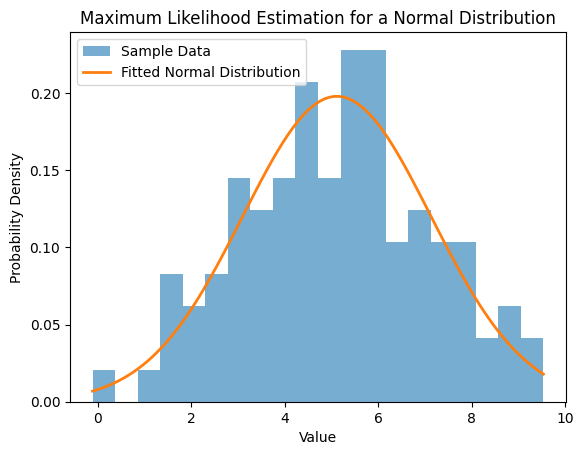

In [8]:
# Plot the results
plt.hist(samples, bins=20, density=True, alpha=0.6, label='Sample Data')
x = np.linspace(min(samples), max(samples), 100)
pdf = 1 / (mle_std * np.sqrt(2 * np.pi)) * np.exp(-(x - mle_mean)**2 / (2 * mle_std**2))
plt.plot(x, pdf, label='Fitted Normal Distribution', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Maximum Likelihood Estimation for a Normal Distribution')
plt.legend()
plt.show()

2.4.2 Linear Regression

Similarly to above, there will be a linear regression done with the use of MLE

First we must generate a data set

In [10]:
# Generate some sample data for linear regression
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
y = true_slope * X + true_intercept + np.random.normal(0, 2, 100)  # Add some noise

In [11]:
# Generate some sample data for linear regression
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1

# Add some noise
y = true_slope * X + true_intercept + np.random.normal(0, 2, 100)


Then using similar code to the previous example we will find the minimum parameters and print them below

In [14]:
# Define the log-likelihood function for linear regression
def log_likelihood_linear(params, X, y):
    slope, intercept = params
    y_pred = slope * X + intercept
    n = len(y)


#use the standaed deviation for the residuals
    sigma = np.std(y - y_pred)
    log_lik = -n/2 * np.log(2 * np.pi * sigma**2) - 1 / (2 * sigma**2) * np.sum((y - y_pred)**2)
    return log_lik

# Define the negative log-likelihood for minimization
def negative_log_likelihood_linear(params, X, y):
    return -log_likelihood_linear(params, X, y)

# Minimize the negative log-likelihood
initial_guess = [1, 0] # initial slope and intercept guesses
result = minimize(negative_log_likelihood_linear, initial_guess, args=(X,y), method='Nelder-Mead')

# Pull the Maximum likelihood estimates
mle_slope = result.x[0]
mle_intercept = result.x[1]

print(f"True Slope: {true_slope}, MLE Slope: {mle_slope}")
print(f"True Intercept: {true_intercept}, MLE Intercept: {mle_intercept}")



True Slope: 2, MLE Slope: 1.9405424428360312
True Intercept: 1, MLE Intercept: 1.4169118932018032


Then we will plot the results

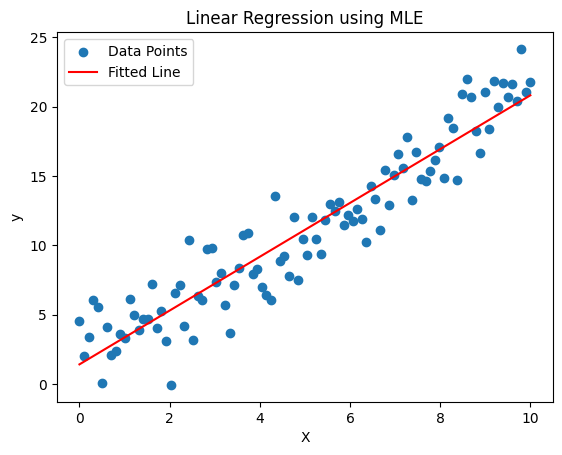

In [15]:
# Plot the results
plt.scatter(X, y, label='Data Points')
plt.plot(X, mle_slope * X + mle_intercept, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using MLE')
plt.legend()
plt.show()

And thus using MLE, we have followed through on a linear regression model

*Use of the internet and AI were used to help aid in the construction of the log_liklihood functions to allow for the solutions*